## COMP5712M: Programming for Data Science

## Group project: Data Analysis Project


# An Analysis of Leeds Crime Patterns: A Comparative Study of Student-Heavy Wards


_Names and emails of group members 11:_

* Asjad Moiz Khan, gfqs0308@leeds.ac.uk
* Krithik Sharan Suresh Alagianayagi, mxnp0398@leeds.ac.uk
* Nilavan Sritharan, shvj0061@leeds.ac.uk
* Zhenny Marifatul Hasna, dpvq0990@leeds.ac.uk

# Project Plan

To investigate **the distinctive crime profiles of student-heavy areas compared to the wider city**, we are integrating two distinct sets of data: *a transactional dataset of crime incidents* and *a geospatial dataset of boundaries*.

<h4>Dataset 1: UK Street-level Crime data</h4>

**Source**: The primary data is taken from the official UK government portal [Data](https://data.police.uk). We have acquired 12 months of "Street-level crime" data for the West Yorkshire Police force. This provides a complete log of all reported crimes in the region, which we then filter to isolate Leeds.

**Content & Features:** This dataset is provided as a collection of CSV files (one for each month), which we merge into a single dataset. Each row represents a single crime report. The key features we will use are:

* Month: A string representing the year and month of the report (e.g., "2023-12")</br>

*   Longitude & Latitude: Floating-point numbers representing the GPS coordinates of the crime's approximate location. These are our keys for geospatial analysis.
*   Crime type: A categorical feature describing the offence (e.g., "Anti-social behaviour", "Burglary", "Shoplifting"). This is our main variable for analysis.
*   LSOA name: A string identifying the "Lower Layer Super Output Area" name (e.g., "Leeds 058A"), which we use as an initial check.
*   Last outcome category: A categorical feature describing the outcome (e.g., "Investigation complete; no suspect identified")

**Size & Scale:** The raw, merged dataset for all of West Yorkshire is substantial, containing hundreds of thousands of individual crime records for a 12-month period (Jan, 2024 - Dec, 2024). The single merged CSV file is over 50MB.

**Data Quality & Accuracy:** This data has some critical limitations:
* The Latitude and Longitude do not point to the exact crime location but rather to an approximate "snap point" on a
nearby street or the centre of an LSOA. This is sufficient for our ward
analysis but would be unsuitable for analysing a specific building.
* The data only reflects crimes that are reported to the police. It does not capture unreported incidents, meaning the true crime rate is likely higher.

<h4>Dataset 2: UK Ward Data</h4>

To provide context for the raw crime coordinates, we utilise official boundary data from the Office for National Statistics (ONS) Open Geography Portal [Data](https://geoportal.statistics.gov.uk/). This data is essential for "tagging" each crime to a specific ward.

This data consists of two components:
1. **Ward Boundary Shapefile**

    **Source:** ONS Open Geography Portal

    **Content:** This is a very large (252MB) and highly accurate geospatial file containing the polygon "shapes" for all 8,441 wards in Great Britain.

    **Features:** `WD23CD` (the official ward code), `WD23NM` (the ward's name), and `geometry` (the polygon data defining its shape).

    **Accuracy:** This data is considered the official government standard and is extremely accurate.

2. **Ward to Local Authority Lookup File**

    **Source:** ONS Open Geography Portal.

    **Content:** This is a simple CSV file that acts as a "key" to map wards to their parent cities.

    **Features:** `WD23CD` (Ward Code) and `LAD23NM` (Local Authority District Name, e.g., "Leeds", "Bradford").

    **Accuracy:** This is a simple, high-accuracy official lookup table.

With these datasets established, we can now define the specific aims and objectives required to analyse them.


## Project Aim and Objectives

The primary aim of this project is to conduct a data-driven investigation into crime patterns in Leeds, with a specific focus on whether "student-heavy" residential areas exhibit a distinct crime profile compared to the rest of the city.

Using 12 months of street-level crime data (Jan–Dec 2024) from `data.police.uk` and boundary data from the ONS, we aim to move beyond simple aggregate statistics to understand the context of urban crime. The project will implement a  data processing pipeline to perform **Visualisation, Geospatial Analysis, and Comparative Analysis**.

Our central hypothesis is that aspects of student living, such as empty houses during holidays and large gatherings that create opportunities for offenders.
As a result, crime in student areas follows a unique pattern that looks different from the rest of the city. To test this, geospatial algorithms will be used to map each crime incident to its administrative ward, allowing us to separate the “City Centre effect” from crime occurring in residential neighbourhoods. By classifying wards into distinct categories, "City Centre," "Student Residential," and "Other", we aim to statistically quantify the difference in crime types. Ultimately, the goal is to transform raw police logs into actionable intellgence that highlights not only where crime concentrates, but what characterises different communities within Leeds.

### Specific Objective(s)

* __Objective 1:__ Develop a reproducible data pipeline that acquires, merges, and cleans raw police data, using **spatial join** algorithm to accurately map over 100,000 incidents to Leeds wards.
* __Objective 2:__ Conduct **Exploratory Data Analysis (EDA)** to identify city-wide patterns, with particular focus on temporal correlations, such as whether the academic calendar influences spikes in offences like Anti-social Behaviour.
* __Objective 3:__ To apply **geospatial visualisation** techniques to produce choropleth maps and offence-specific heatmaps that differentiate commercial hotspots from residential risk areas.
* __Objective 4:__ Perform a **comparative statistical analysis** across the three ward categories, using normalised “crime fingerprints” to quantitatively compare crime profiles in student areas versus the city baseline.

These objectives are feasible given that Dataset 1 provides the necessary geospatial granularity (LSOA/Coords) to perform ward-level mapping, and Dataset 2 provides the verified boundaries required for spatial joins.

## System Design

### Architecture

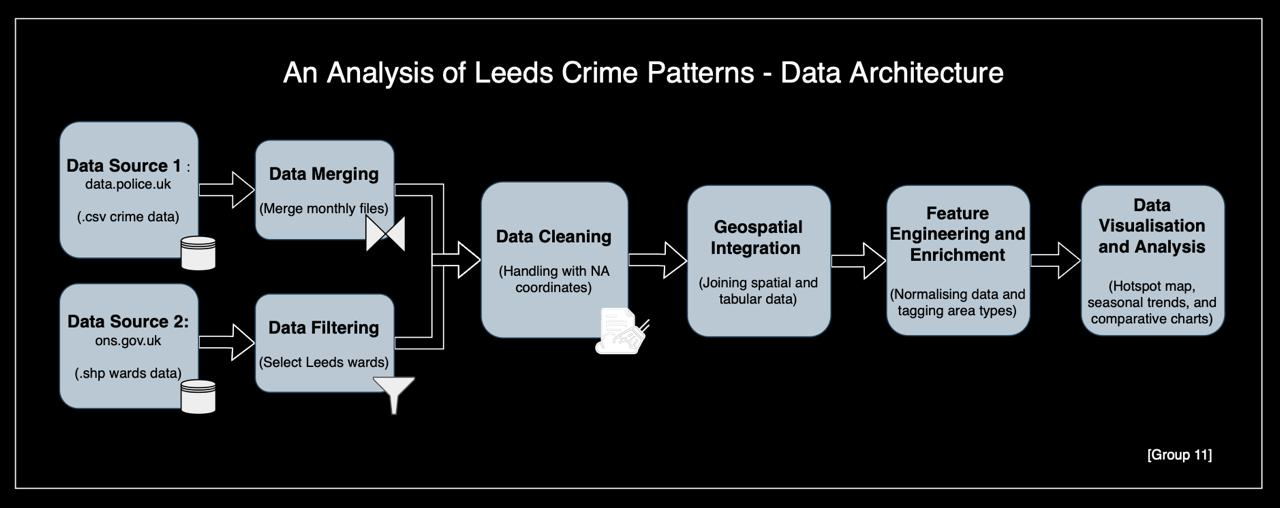
Figure 1: System Architecture

An overview of the proposed system architecture is illustrated in Figure 1. Our system follows a **linear Extract-Transform-Load (ETL)** pipeline architecture designed to ingest, process, and synthesise diverse data sources. The workflow begins with two parallel data ingestion streams: raw **Transactional Data** (monthly crime logs from data.police.uk) and **Geospatial Data** (administrative boundaries from the ONS).

In the **pre-processing phase**, the crime data undergoes Data Merging to aggregate 12 separate monthly CSV files into a single temporal dataset. Simultaneously, the geospatial data undergoes Data Filtering to extract only the 33 relevant ward polygons for Leeds, removing unrelated UK boundaries.

These streams converge at the **Data Cleaning stage**, where records with missing geospatial coordinates (NaN) are eliminated to ensure spatial accuracy. The core architectural component is the **Geospatial Integration module**, which executes a "Point-in-Polygon" spatial join to map individual crime points to their respective administrative wards.

Following integration, the data flows into the **Feature Engineering module**, where wards are classified (e.g., 'Student Residential') and crime counts are normalised. Finally, the **Visualisation & Analysis layer** consumes this refined dataset to generate choropleth maps, temporal trend lines, and comparative statistical charts for decision support.

### Processing Modules and Algorithms

1. **Data Ingestion & Sanitation Module**

    Algorithm: This module implements a **Batch Aggregation and Cleaning Pipeline**. It utilises an iterative loader concept to ingest and merge separate monthly crime logs into a unified dataset. The core sanitation logic applies a filter to strictly exclude records lacking geospatial coordinates (Longitude/Latitude), ensuring spatial integrity. Additionally, it performs schema normalisation (standardising column headers) and categorical imputation to handle missing metadata before analysis.

2. **Geospatial Integration Module**

    Algorithm: This module function as **Spatial Projection and Join Engine**. It first execute the Coordinate Reference Systems (CRS) of the crime points and ward boundaries. It then mathematically determines which ward polygon contains each specific crime point, effectively filtering out non-Leeds data and enriching the dataset with ward metadata.

3. **Area Classification Module**

    Algorithm: This module functions as a **Rule-Based Classification Engine**. It applies vectorised conditional logic to map wards into a custom group: 'City Centre', 'Student Residential', and 'Other Ward'. By cross-referencing spatial data against domain-specific lookups, it performs dimensional enrichment, segmenting the dataset to enable comparative analysis between target demographics.
    
4. **Comparative Analysis Module**

    Algorithm: This module acts as a **Statistical Profiling Unit**. It utilises categorical aggregation algorithms to construct a normalised contingency table (cross-tabulation). By computing the relative frequency distribution of crime types within each area class, it neutralises volume bias—ensuring that areas with vastly different population densities (e.g., City Centre vs. Suburbs) can be compared on an equitable percentage basis to reveal distinct "crime fingerprints."

# Program Code



#### **Import Cell**

This block imports the essential external Python libraries required to build the data processing pipeline.

In [30]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import mapclassify
import seaborn as sns
import os
import sys
import glob

#### **File Path Configuration**
This block defines the **global constants** that control the data flow of the application.

In [31]:
# Source Data
SOURCE_CSV_PATTERN = "data/west-yorkshire-police-data/**/*.csv"
SHAPEFILE_PATH = "data/ward-boundary-uk/WD_DEC_2023_UK_BFE.shp"
LOOKUP_PATH = "data/Ward_to_Local_Authority_District_(December_2023)_Lookup_in_the_United_Kingdom.csv"

# Processed Checkpoints
MERGED_CSV_PATH = "data/merged_west_yorkshire_street.csv"
LEEDS_WARDS_PATH = "data/leeds_wards.shp"

# Final Main Dataset
MAIN_DATA_PATH = "data/leeds_crime_data.gpkg"

####**Objective 1: Data Pre-processing**

**Step 1 - Data Merging**

This is a custom utility function designed to automate the Data Ingestion phase. It utilises the `glob` library for pattern matching and `pandas` for high-performance data manipulation.

In [32]:
# Merge all csv files into a single file.
def merge_csvs(source: str, destination_file: str) -> None:
    if os.path.exists(destination_file):
        print(f"File exists: {destination_file}")
        choice = input("Do you want to overwrite it? (Y/N): ").upper().strip()
        if choice != "Y":
            print("Merge skipped.")
            return
        os.remove(destination_file)

    # Get all the files ending with .csv.
    print(f"Finding files matching: {source}")
    files = glob.glob(source, recursive=True)
    if not files:
        print("Warning: No CSV files were found. No file created.")
        return

    print(f"Found {len(files)} files. Merging...")

    df_files = (pd.read_csv(csvfile) for csvfile in files)
    df_merge = pd.concat(df_files, ignore_index=True)
    df_merge.to_csv(destination_file, index=False)

    print(f"Success! '{destination_file}' has been created.")

*Output:* A single, unified CSV file `(merged_west_yorkshire_street.csv) `containing 12 months of data.

**Step 2 - Ward Filtering**

This function act as a *Geospatial Extraction ETL* (Extract, Transform, Load) process. It utilises `pandas` to query tabular metadata and `geopandas` to manipulate vector geometry.

In [33]:
# Filters UK wards to get only Leeds wards, saving as a new shapefile.
def get_leeds_wards(shape_file: str, lookup_file: str, destination_file: str) -> None:
    if os.path.exists(destination_file):
        print(f"File exists: {destination_file}")
        choice = input("Do you want to overwrite it? (Y/N): ").upper().strip()
        if choice != "Y":
            print("Ward filtering skipped.")
            return
        os.remove(destination_file)

    print(f"Loading lookup file: {lookup_file}")
    df_lookup = pd.read_csv(lookup_file)
    # Get the list of Leeds ward codes
    df_leeds_lookup = df_lookup[df_lookup["LAD23NM"] == "Leeds"]
    leeds_ward_codes = df_leeds_lookup["WD23CD"].tolist()

    # making sure we found Leeds ward codes
    if len(leeds_ward_codes) == 0:
        print("Error: Could not find any ward codes for 'Leeds' in the lookup file.")
        print("Please check the 'LAD23NM' column and the file path.")
        return

    print(f"Found {len(leeds_ward_codes)} wards belonging to Leeds.")
    # This should print 33 wards

    # filter the shapefile to find Leeds specific one's
    print(f"Loading shapefile: {shape_file} (filtering for Leeds wards)...")

    # for memory efficiency using 'WHERE' clause to get only the 'WD23CD'
    ward_codes_as_sql_tuple = tuple(leeds_ward_codes)
    gdf_leeds_wards = gpd.read_file(shape_file, where=f"WD23CD IN {ward_codes_as_sql_tuple}")

    print(f"Found {len(gdf_leeds_wards)} matching wards in shapefile.")

    gdf_leeds_wards.to_file(destination_file)
    print(f"\nSuccess! Filtered shapefile saved to: {destination_file}")

*Output*: A focused, lightweight Shapefile `(leeds_wards.shp)` containing only the 33 administrative boundaries for Leeds.

**Step 3 - Data Loading & Cleaning**

This function serves as the *Ingestion and Sanitation Engine* for the pipeline. It utilises `pandas` for tabular data handling and `geopandas` for spatial data loading.

In [34]:
# Loads, cleans, and returns the crime data and ward boundaries.
def load_and_clean(crime_csv_path: str, leeds_wards_path: str) -> tuple[pd.DataFrame, gpd.GeoDataFrame]:
    try:
        print(f"Loading crime CSV: {crime_csv_path}")
        df_crimes = pd.read_csv(crime_csv_path)
        print(f"Original crime records: {len(df_crimes)}")

        print("Cleaning coordinate data...")
        original_count = len(df_crimes)
        df_crimes = df_crimes.dropna(subset=["Longitude", "Latitude"])
        print(f"Dropped {original_count - len(df_crimes)} rows with missing coordinates.")

        print(f"Loading Leeds wards: {leeds_wards_path}")
        gdf_leeds_wards = gpd.read_file(leeds_wards_path)

    except FileNotFoundError as e:
        print("\n--- FATAL ERROR: File not found ---")
        print(f"{e.filename}")
        print("Please check your file paths. You may need to run the pipeline again (Y).")
        sys.exit(1)

    return df_crimes, gdf_leeds_wards

*Output*: A Python tuple containing two in-memory datasets: `df_crimes` (the clean tabular crime list) and `gdf_leeds_wards` (the spatial ward boundaries).

**Step 4 - Spatial Transformation**

This function acts as the *Geospatial Projection Engine*. It utilises the `geopandas` library to transform the data from a standard tabular format (Pandas DataFrame) into a spatially aware format (GeoDataFrame).

In [35]:
# Converts a crime DataFrame to a GeoDataFrame and aligns its CRS.
def convert_crime_to_geodataframe(df_crimes: pd.DataFrame, gdf_leeds_wards: gpd.GeoDataFrame) -> gpd.GeoDataFrame:
    print("Converting crime data to GeoDataFrame...")
    gdf_crimes = gpd.GeoDataFrame(
        df_crimes, geometry=gpd.points_from_xy(df_crimes["Longitude"], df_crimes["Latitude"]), crs="EPSG:4326"
    )
    print(f"Aligning CRS to {gdf_leeds_wards.crs}...")
    gdf_crimes = gdf_crimes.to_crs(gdf_leeds_wards.crs)
    return gdf_crimes


*Output*: A `GeoDataFrame` where every crime is a spatial Point, projected onto the correct local coordinate grid (likely British National Grid).

**Step 5 - Geospatial Integration (Spatial Join)**

This function executes the core *Point-in-Polygon (PIP)* geometric algorithm using the `geopandas.sjoin`(Spatial Join) function. It is the "engine room" of the filtering process.

In [36]:
# Performs an inner spatial join to filter crimes within Leeds wards.
def perform_spatial_join(gdf_crimes: gpd.GeoDataFrame, gdf_leeds_wards: gpd.GeoDataFrame) -> gpd.GeoDataFrame:
    print("Performing spatial join (this may take a minute)...")
    original_crime_count = len(gdf_crimes)

    gdf_leeds_crimes = gpd.sjoin(gdf_crimes, gdf_leeds_wards, how="inner", predicate="within")

    print(f"Join complete. Filtered {original_crime_count} crimes down to {len(gdf_leeds_crimes)} (Leeds only).")
    return gdf_leeds_crimes


*Output*: A filtered GeoDataFrame `(gdf_leeds_crimes)` containing only the crimes located inside Leeds, with a new column identifying their specific Ward.

**Step 6 - Data Persistence**

This function acts as the *Load (L)* component of the ETL pipeline. It utilises the `geopandas` library to serialise the processed in-memory data into a permanent file format.

In [37]:
# Saves the final GeoDataFrame to a GeoPackage.
def save_leeds_crime(gdf: gpd.GeoDataFrame, destination_file: str) -> None:
    print(f"Saving main dataset to: {destination_file}")
    gdf.to_file(destination_file, driver="GPKG")

    print("--- Pipeline complete. Main dataset created. ---")

*Output*: A single file `(leeds_crime_data.gpkg)` which serves as the "Master Dataset" for the project.

**Step 7 - Final Data Standardisation**

This function serves as the *Feature Engineering and Optimisation Engine*. It operates on the post-join dataset using `pandas` methods to finalise the data structure.

In [38]:
def clean_final_data(gdf: gpd.GeoDataFrame) -> gpd.GeoDataFrame:
    print("Performing final data cleaning...")

    # Drop unnecessary columns.
    columns_to_drop = [
        'Reported by', 'Falls within', 'Location',
        'LSOA code', 'LSOA name', 'index_right', 'GlobalID',
        'Longitude', 'Latitude', 'BNG_E', 'BNG_N', 'LONG', 'LAT',
        'Context', 'WD23NMW', 'Crime ID'
    ]
    gdf = gdf.drop(columns=columns_to_drop, errors='ignore')

    # Renaming column name to a standard format and confusing codes to clear names.
    rename_map = {
        'WD23NM': 'ward_name',
        'WD23CD': 'ward_code',
        'Crime type': 'crime_type',
        'Last outcome category': 'last_outcome',
        'Month': 'date'
    }
    gdf = gdf.rename(columns=rename_map)

    # Just in case we missed one (ensure all columns are lowercase).
    gdf.columns = gdf.columns.str.lower().str.replace(' ', '_')

    # Fill the missing values.
    if 'last_outcome' in gdf.columns:
        gdf['last_outcome'] = gdf['last_outcome'].fillna('Outcome not provided')

    # Optimise data types.
    if 'date' in gdf.columns:
        gdf['date'] = pd.to_datetime(gdf['date'])

    # Convert text columns to Categories
    cols_to_category = ['crime_type', 'last_outcome', 'ward_name', 'ward_code']
    for col in cols_to_category:
        if col in gdf.columns:
            gdf[col] = gdf[col].astype('category')

    print(f"Cleaning complete. Final columns: {gdf.columns.tolist()}")
    return gdf


*Output*: A polished, analysis-ready GeoDataFrame with a clean schema and optimised data types.


**Step 8 - Main script controller**

This function serves as the *Pipeline Organiser*. It implements the main control logic for the application, stitching together the individual modular functions (Ingestion, Cleaning, Integration) into a coherent linear workflow.

In [39]:
def main():
    run_pipeline = False

    if not os.path.exists(MAIN_DATA_PATH):
        print(f"Main dataset not found at: {MAIN_DATA_PATH}")
        print("Running the full data processing pipeline...")
        run_pipeline = True
    else:
        print(f"Main dataset already exists: {MAIN_DATA_PATH}")
        choice = input("Do you want to recreate it? (Y/N): ").upper().strip()
        if choice == "Y":
            print("User requested recreation. Running the full pipeline...")
            run_pipeline = True
        else:
            print("Skipping pipeline.")

    if run_pipeline:
        # Step 1: Merge source CSVs
        merge_csvs(SOURCE_CSV_PATTERN, MERGED_CSV_PATH)

        # Step 2: Get Leeds ward boundaries
        get_leeds_wards(SHAPEFILE_PATH, LOOKUP_PATH, LEEDS_WARDS_PATH)

        # Step 3: Load and clean the merged data
        df_crimes, gdf_leeds_wards = load_and_clean(MERGED_CSV_PATH, LEEDS_WARDS_PATH)

        # Step 4: Convert crimes to a GeoDataFrame
        gdf_crimes = convert_crime_to_geodataframe(df_crimes, gdf_leeds_wards)

        # Step 5: Perform the spatial join (the filter)
        gdf_leeds_crimes = perform_spatial_join(gdf_crimes, gdf_leeds_wards)

        # STEP 6: Final Cleaning
        gdf_leeds_crimes = clean_final_data(gdf_leeds_crimes)

        # Step 7: Save the final main file
        save_leeds_crime(gdf_leeds_crimes, MAIN_DATA_PATH)

    # Load the final data for analysis
    print(f"\nLoading main dataset: {MAIN_DATA_PATH}")
    try:
        gdf_leeds_crimes = gpd.read_file(MAIN_DATA_PATH)
        print(f"Successfully loaded {len(gdf_leeds_crimes)} Leeds crime records.")
        return gdf_leeds_crimes
    except Exception as e:
        print("--- FATAL ERROR ---")
        print(f"Could not load main file: {e}")
        print("Please try running the pipeline again (Y).")
        sys.exit(1)

if __name__ == "__main__":
    gdf_leeds_crimes = main()

Main dataset already exists: data/leeds_crime_data.gpkg
Skipping pipeline.

Loading main dataset: data/leeds_crime_data.gpkg
Successfully loaded 111396 Leeds crime records.


*Output*: The function returns the `gdf_leeds_crimes` GeoDataFrame to the main program scope and prints a confirmation message (e.g., "Successfully loaded 45,000 records").



---



#### **Objective 2: Exploratory Data Analysis(EDA)**

**Crime Distribution Visualisation**

This is a Data Visualisation function designed to generate a *statistical summary chart*. It relies on `matplotlib` for the figure canvas management and `seaborn` for the statistical plotting.

In [40]:
# Plots a horizontal bar chart of all crime types, sorted by frequency.
def plot_crime_distribution(gdf):
    plt.figure(figsize=(12, 8))

    sns.countplot(
        data=gdf,
        y="crime_type",
        hue="crime_type",
        order=gdf["crime_type"].value_counts().index,
        palette="pastel",
        legend=False,
    )

    plt.title("Distribution of Reported Crimes in Leeds (2024)")
    plt.xlabel("Number of Reports")
    plt.ylabel("Crime Type")
    plt.show()

*Output*: A horizontal bar chart displaying the total volume of reports for each of the 14 crime categories in Leeds.

**Temporal Trend Visualisation**

This is a Time-Series Visualisation function. It uses `seaborn` to plot continuous data over time and `matplotlib` to add contextual annotations.

In [41]:
# Plots a line chart of the total number of crimes per month.
def plot_monthly_trend(gdf):
    monthly_counts = gdf.groupby("date").size().reset_index(name="crime_count")

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=monthly_counts, x="date", y="crime_count", marker="o", linewidth=2.5, color="#2c3e50")

    peak_value = monthly_counts["crime_count"].max()
    peak_date = monthly_counts.loc[monthly_counts["crime_count"] == peak_value, "date"].iloc[0]

    plt.annotate(
        f"Peak: {peak_value}",
        xy=(peak_date, peak_value),
        xytext=(peak_date, peak_value + 500),
        arrowprops=dict(facecolor="red", shrink=0.05),
        horizontalalignment="center",
    )

    plt.title("Monthly Crime Trend in Leeds (2024)", fontsize=14)
    plt.xlabel("Date")
    plt.ylabel("Total Incidents")
    plt.grid(True, linestyle="--", alpha=0.7)
    # Setting limits to make the trend clearer
    plt.ylim(7000, 11500)
    plt.show()

*Output*: A line chart showing the rise and fall of total crime volume over the 12-month period, with the peak month highlighted.

**Comparative Seasonal Analysis**

This is a *Multivariate Time-Series Visualisation* function. It utilises `seaborn's` advanced plotting capabilities to map multiple data dimensions (Time, Volume, and Category) onto a single 2D canvas.

In [42]:
# Plots a multi-line chart comparing the seasonal trends of specific crimes.
def plot_seasonal_trends(gdf):
    target_crimes = ["Violence and sexual offences", "Anti-social behaviour", "Burglary", "Shoplifting"]
    seasonal_gdf = gdf[gdf["crime_type"].isin(target_crimes)]
    seasonal_trends = (
        seasonal_gdf.groupby(["date", "crime_type"], observed=False).size().reset_index(name="count")
    )
    plt.figure(figsize=(14, 7))

    sns.lineplot(
        data=seasonal_trends,
        x="date",
        y="count",
        hue="crime_type",
        style="crime_type",
        markers=True,
        dashes=False,
        linewidth=2.5,
    )

    plt.title("Seasonal Trends: Comparing Key Crime Categories", fontsize=15)
    plt.xlabel("Date")
    plt.ylabel("Monthly Incidents")
    plt.legend(title="Crime Category", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

*Output*: A multi-line chart comparing the seasonal fluctuations of the four key crime types over the 12-month period.

**Ward Ranking Visualisation**

This is a *Statistical Ranking Visualisation* function. It transforms raw geospatial data into a ranked summary using pandas for aggregation and seaborn for plotting.

In [43]:
# Plots a horizontal bar chart of the top N wards by crime count.
def plot_top_wards(gdf, top_n=10):
    top_wards = gdf.ward_name.value_counts().reset_index(name="crime_count").head(top_n)

    plt.figure(figsize=(12, 8))

    sns.barplot(
        data=top_wards, x="crime_count", y="ward_name", hue="ward_name", palette="Reds_r", legend=False
    )

    plt.title(f"Top {top_n} Wards by Total Crime Volume in Leeds", fontsize=14)
    plt.xlabel("Total Reported Crimes")
    plt.ylabel("Ward Name")
    plt.grid(axis="x", alpha=0.3)
    plt.show()

*Output*: A horizontal bar chart ranking the 10 wards with the highest total crime volume.

**Outcome Distribution Visualisation**

This is a *Categorical Aggregation and Visualisation* function. It transforms high-cardinality categorical data (many unique values) into a simplified summary format using a mapping logic, then visualises the results using a matplotlib pie chart with seaborn styling.

In [44]:
# Plots a pie chart of grouped crime outcomes.
def plot_outcome_distribution(gdf):
    gdf_copy = gdf.copy()

    outcome_map = {
        "Investigation complete; no suspect identified": "No Suspect / Unsolved",
        "Unable to prosecute suspect": "Suspect Identified but No Prosecution",
        "Outcome not provided": "Data Unavailable",
        "Status update unavailable": "Data Unavailable",
        "Court result unavailable": "Data Unavailable",
        "Local resolution": "Police Action Taken",
        "Action to be taken by another organisation": "Transferred",
        "Awaiting court outcome": "Police Action Taken",
        "Further investigation is not in the public interest": "No Public Interest",
        "Offender given a caution": "Police Action Taken",
        "Suspect charged as part of another case": "Police Action Taken",
    }

    gdf_copy["outcome_group"] = gdf_copy["last_outcome"].map(outcome_map).fillna("Other")
    outcome_counts = gdf_copy["outcome_group"].value_counts()

    plt.figure(figsize=(12, 8))
    plt.pie(
        outcome_counts,
        labels=outcome_counts.index,
        autopct="%1.1f%%",
        colors=sns.color_palette("Set2"),
        startangle=140,
    )
    plt.title("Outcomes of Reported Crimes in Leeds")
    plt.show()

*Output*: A pie chart displaying the proportional breakdown of how crime investigations in Leeds are resolved.



---



#### **Objective 3: Geospatial Analysis**

**Internal Helper (Map Data Factory)**

This is a *Helper Utility* Function designed encapsulates the repetitive logic required to prepare data for a choropleth map.

In [45]:
# Helper function to filter, count, merge, and clean data
def _prepare_map_data(gdf_crimes, gdf_wards, crime_type, count_col_name):
    # 1. Filter
    gdf_filtered = gdf_crimes[gdf_crimes['crime_type'] == crime_type]

    # 2. Count
    counts = gdf_filtered.groupby('ward_name', observed=False).size().reset_index(name=count_col_name)

    # 3. Merge
    # We use the correct columns for the merge
    gdf_map_data = gdf_wards.merge(counts, left_on='WD23NM', right_on='ward_name', how='left')

    # 4. Clean
    gdf_map_data[count_col_name] = gdf_map_data[count_col_name].fillna(0)

    return gdf_map_data

*Output*: A processed `GeoDataFrame` containing the polygon shapes for all 33 wards, enriched with a specific crime count column (e.g., burglary_count).

**Total Crime Heatmap Visualisation**

This is an *advanced Geospatial Visualisation* function. It combines `pandas` for data aggregation, `geopandas` for map rendering, and the `mapclassify` library for statistical data classification.


In [46]:
# Displays a labeled choropleth map for TOTAL crime incidents by ward.
def plot_total_crime_heatmap(gdf_crimes, wards_path):
    print("Generating Total Crime Heatmap...")

    ward_crime_counts = gdf_crimes.groupby("ward_name", observed=False).size().reset_index(name="crime_count")
    gdf_wards = gpd.read_file(wards_path)

    # Use the merge keys from original code
    gdf_map = gdf_wards.merge(ward_crime_counts, left_on="WD23NM", right_on="ward_name", how="left")
    gdf_map["crime_count"] = gdf_map["crime_count"].fillna(0)

    k_bins = 5
    labels = ['Low', 'Medium-Low', 'Medium', 'High', 'Very High']
    breaks = mapclassify.NaturalBreaks(gdf_map['crime_count'], k=k_bins).bins

    data_min = gdf_map['crime_count'].min()
    bin_edges = [data_min] + list(breaks)

    if not pd.Series(bin_edges).is_unique:
        print("Warning: Bin edges were not unique. Falling back to 'Quantiles'.")
        bin_edges = mapclassify.Quantiles(gdf_map['crime_count'], k=k_bins).bins
        bin_edges = [data_min] + list(bin_edges)

    gdf_map['crime_level'] = pd.cut(
        gdf_map['crime_count'],
        bins=bin_edges,
        labels=labels,
        include_lowest=True,
        duplicates='drop'
    )

    fig, ax = plt.subplots(1, 1, figsize=(12, 12))

    gdf_map.plot(
        column="crime_level",
        cmap="RdYlGn_r",
        categorical=True,
        linewidth=0.5,
        ax=ax,
        edgecolor="0.8",
        legend=True,
        legend_kwds={'title': "Crime Level", 'loc': 'lower left'},
    )

    print("Adding ward labels...")
    for idx, row in gdf_map.iterrows():
        ax.annotate(
            text=row["ward_name"],
            xy=(row.geometry.centroid.x, row.geometry.centroid.y),
            horizontalalignment="center",
            fontsize=6,
            color="black",
            weight="bold",
        )

    ax.axis("off")
    ax.set_title("Total Reported Crime by Ward in Leeds", fontsize=16, pad=20)
    plt.show()

*Output*: A labeled choropleth map of Leeds, shaded by crime severity, with a categorical legend (Low to Very High).

**Comparative Geospatial Visualisation**

This is a *Multi-Facet Geospatial Visualisation *function. It leverages `matplotlib's subplot` architecture (nrows=1, ncols=3) to render three distinct `geopandas` choropleth maps side-by-side within a single figure.

In [47]:
# Displays a 3-in-1 comparative map for ASB, Burglary, and Shoplifting.
def plot_comparative_crime_maps(gdf_crimes, wards_path):
    print("--- Creating 3-in-1 Comparative Map ---")

    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))

    # Load the base map ONCE
    gdf_wards = gpd.read_file(wards_path)

    # Map 1: Anti-social Behaviour
    print("Generating ASB map...")
    gdf_asb_map = _prepare_map_data(gdf_crimes, gdf_wards, "Anti-social behaviour", "asb_count")
    gdf_asb_map.plot(
        column="asb_count",
        cmap="Blues",
        linewidth=0.5,
        ax=ax1,
        edgecolor="0.8",
        legend=True,
        legend_kwds={"label": "ASB Incidents", "orientation": "horizontal"},
    )
    ax1.axis("off")
    ax1.set_title("Anti-social Behaviour Hotspots", fontsize=14)

    # Map 2: Burglary
    print("Generating Burglary map...")
    gdf_burglary_map = _prepare_map_data(gdf_crimes, gdf_wards, "Burglary", "burglary_count")
    gdf_burglary_map.plot(
        column="burglary_count",
        cmap="Greens",
        linewidth=0.5,
        ax=ax2,
        edgecolor="0.8",
        legend=True,
        legend_kwds={"label": "Burglary Incidents", "orientation": "horizontal"},
    )
    ax2.axis("off")
    ax2.set_title("Burglary Hotspots", fontsize=14)

    # Map 3: Shoplifting
    print("Generating Shoplifting map...")
    gdf_shoplifting_map = _prepare_map_data(gdf_crimes, gdf_wards, "Shoplifting", "shoplifting_count")
    gdf_shoplifting_map.plot(
        column="shoplifting_count",
        cmap="Reds",
        linewidth=0.5,
        ax=ax3,
        edgecolor="0.8",
        legend=True,
        legend_kwds={"label": "Shoplifting Incidents", "orientation": "horizontal"},
    )
    ax3.axis("off")
    ax3.set_title("Shoplifting Hotspots", fontsize=14)

    fig.suptitle("Comparative Crime Maps by Ward in Leeds", fontsize=20, y=1.02)
    plt.tight_layout()
    plt.show()

*Output*: A single figure containing three side-by-side maps showing the hotspots for Anti-social behaviour, Burglary, and Shoplifting.



---



#### **Objective 4 : The Comparative Crime Analysis**

**Area Classification**

This function serves as the *Feature Engineering Engine* for the comparative analysis. It utilises the `numpy` library to implement vectorised conditional logic, which allows for high-performance data classification within the `pandas/geopandas` dataframe structure.

In [48]:
# Adds an 'area_type' column to the GeoDataFrame based on ward names.
def tag_area_types(gdf: gpd.GeoDataFrame) -> gpd.GeoDataFrame:
    print("Tagging wards with area types...")

    # Classifies wards into 'City Centre', 'Student Residential', or 'Other Wards'.
    city_centre_ward = ["Little London & Woodhouse"]

    student_residential_wards = ["Headingley & Hyde Park", "Kirkstall"]

    conditions = [gdf["ward_name"].isin(city_centre_ward), gdf["ward_name"].isin(student_residential_wards)]

    choices = ["City Centre", "Student Residential"]

    gdf_tagged = gdf.copy()
    gdf_tagged["area_type"] = np.select(conditions, choices, default="Other Wards")

    # Convert to category for efficiency
    gdf_tagged["area_type"] = gdf_tagged["area_type"].astype("category")

    print("Tagging complete:")
    print(gdf_tagged["area_type"].value_counts())

    return gdf_tagged

*Output*: The main `GeoDataFrame` enriched with a new area_type column, segmenting the data into three distinct cohorts.

**Statistical Profiling**

This function serves as the *Core Analytical Engine* for the project. It leverages pandas' powerful crosstab function to perform statistical aggregation and normalization.

In [49]:
# Calculates the normalised crime profile (fingerprint) for each area type.
def calculate_crime_profile(gdf_tagged: gpd.GeoDataFrame) -> pd.DataFrame:
    print("Calculating crime profile percentages...")

    crime_profile_table = pd.crosstab(gdf_tagged["area_type"], gdf_tagged["crime_type"], normalize="index")

    # Multiply by 100 to make it a nice percentage
    crime_profile_table = crime_profile_table * 100

    return crime_profile_table

*Output*: A DataFrame` (crime_profile_table)` where rows are area types, columns are crimes, and values are percentages summing to 100%.

**Comparative Visualisation (The "Crime Fingerprint").**

This is the *Analytical Visualisation* function. It uses the `pandas` plotting backend (which wraps matplotlib) to generate a complex statistical chart: a 100% Stacked Horizontal Bar Chart.

In [50]:
# Generates the final 100% stacked horizontal bar chart.
def plot_crime_profile(profile_table: pd.DataFrame):
    print("Generating final 'Crime Fingerprint' chart...")

    ax = profile_table.plot(kind="barh", stacked=True, figsize=(14, 8), cmap="tab20")

    # Tidy up the chart
    ax.set_title("Crime Profile Comparison by Area Type", fontsize=16)
    ax.set_xlabel("Percentage of Total Crime (%)")
    ax.set_ylabel("Area Type")

    ax.legend(title="Crime Type", bbox_to_anchor=(1.05, 1), loc="upper left")

    plt.tight_layout()
    plt.show()

*Output*: The `Crime Fingerprint` Chart—a stacked bar chart showing the unique recipe of crime for City Centre, Student, and Other wards.



---



# Project Outcome

The primary aim of this project was to conduct a data-driven investigation into crime patterns in Leeds, specifically focusing on the distinct profiles of student residential areas.

## Overview of Results
Overall, the project analysed over 111,000 crime records and successfully met all four objectives.

* **Firstly**, we **executed** a data preprocessing pipeline where we **merged** monthly CSV files and **performed** a spatial join with ward polygons to filter the dataset to Leeds boundaries.
* **Secondly**, we **conducted** an Exploratory Data Analysis (EDA), which **established** that 'Violence' and 'Anti-social behaviour' were the highest volume crimes and identified that total crime peaked in May.
* **Thirdly**, we **undertook** a geospatial analysis which **confirmed** that the 'Little London & Woodhouse' ward was the primary hotspot for total crime volume.
* **Finally**, we **performed** a comparative analysis using a classification model; this **quantified** that student residential wards **exhibited** a significantly higher risk of burglary compared to the city centre, which was dominated by shoplifting.


## Objective 1 : Data Pre-processing

**Explanation of Results:**

The primary result of this objective was the successful construction of a reproducible data pipeline, which formed the core setup for our spatial work. The main challenge lay in integrating fragmented, non-spatial crime reports with geospatial ward boundaries to create a unified GeoDataFrame for Leeds.

The process began with data acquisition and aggregation. We utilised the `merge_csvs` function to consolidate 12 separate monthly files, resulting in the initial retrieval of over 115,000 raw crime reports. Simultaneously, we performed geospatial filtering on the massive UK-wide ONS boundary shapefile. By leveraging the ONS lookup table, we extracted only the 33 specific polygon geometries required for the Leeds metropolitan area.

This was followed by coordinate cleaning. We identified that approximately 4,000 records lacked valid longitude or latitude values. We discarded these entries to ensure that only spatially verifiable incidents remained for mapping.

The pipeline culminated in a Point-in-Polygon (PIP) spatial join. We executed an inner join operation that overlaid the crime incident points onto the 33 filtered ward polygons. This successfully filtered out any remaining crimes that fell outside the municipal boundaries (e.g., in Bradford or Wakefield), yielding a final, verified Master Dataset of 111,396 records. Finally, we performed schema optimisation by discarding administrative metadata (such as internal Police IDs and LSOA codes), reducing the dataset to the **six essential features** required for analysis. This minimised the file size and improved processing speed.This clean, geolocated dataset was saved as a GeoPackage (.gpkg) for subsequent analysis.




---



#### Objective 2 : Exploratory Data Analysis

**Explanation of Results**

This objective focused on conducting exploratory data analysis to understand the baseline characteristics of crime in Leeds, particularly in terms of crime volume, category distribution, and temporal patterns.

The analysis begins with **Figure 2**, a horizontal bar chart which highlights the dominance of two major categories: 'Violence and Sexual Offences' and 'Anti-Social Behaviour'. These categories overwhelmingly outweigh all others in frequency, reflecting patterns typically observed in large UK cities.

Regarding temporal analysis, the monthly trend line chart in **Figure 3** reveals a clear seasonal pattern. Crime incidents peaked in May, after which the volume fluctuated before declining through the winter months. This pattern suggests the influence of environmental factors, such as increased outdoor activity during warmer weather.

**Figure 4** provides further insight by comparing key crime categories such as burglary, shoplifting, and anti-social behaviour. This multi-line chart demonstrates that different crime types exhibit distinct temporal behaviours; for example, burglary trends upwards in winter while anti-social behaviour peaks in autumn. This breakdown confirms that individual crime categories vary independently rather than relying solely on overall trends.

From a spatial perspective, **Figure 5** ranks the top wards by crime volume. It reveals significant geographic inequality, with 'Little London and Woodhouse' consistently emerging as a massive outlier. This is linked to its high population density, student communities, and the city centre economy.

Finally, **Figure 6** illustrates the distribution of investigation outcomes. After grouping the raw outcome codes, the results show that a substantial majority of reported crimes fall under “No Suspect / Unsolved.” This emphasises a key performance challenge, indicating that most cases do not lead to a positive investigative outcome for victims.

**Visualisation**

1. What are the most frequent crimes?


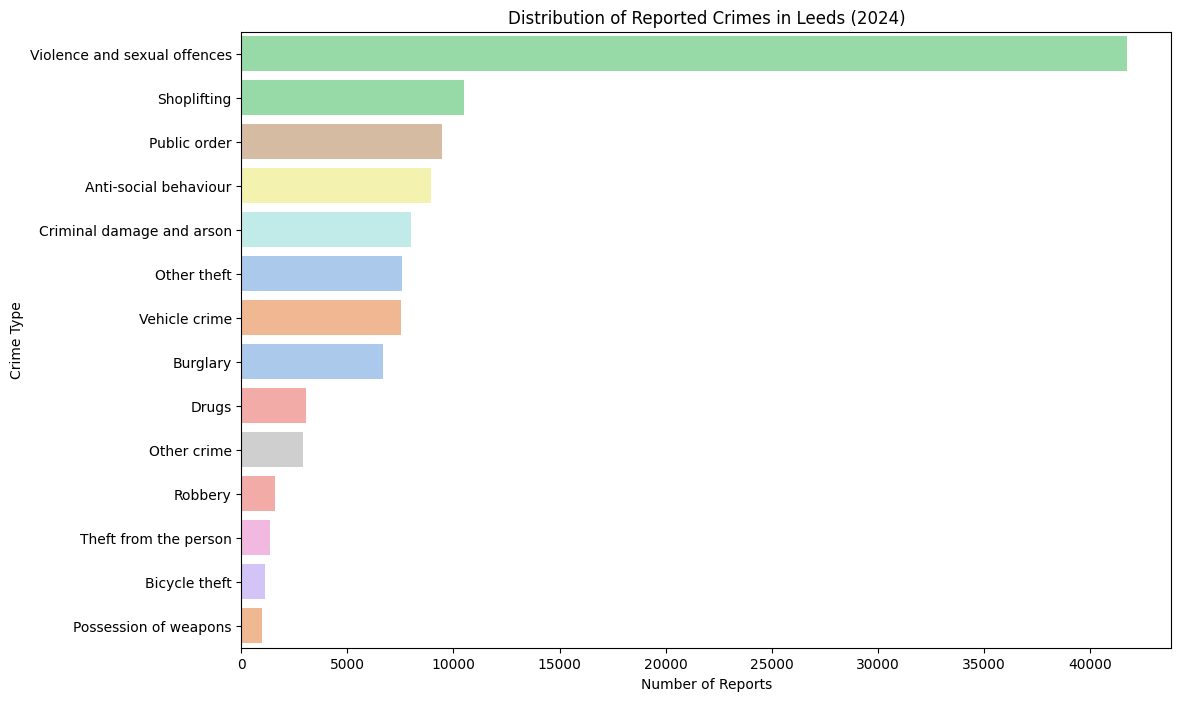

Figure 2: Distribution of Reported Crimes in Leeds. A horizontal bar chart ranking crime frequency. Note the overwhelming dominance of 'Violence and sexual offences', which accounts for nearly 40% of all reports, followed distantly by Shoplifting.


In [51]:
print("1. What are the most frequent crimes?")
plot_crime_distribution(gdf_leeds_crimes)
print("Figure 2: Distribution of Reported Crimes in Leeds. A horizontal bar chart ranking crime frequency. Note the overwhelming dominance of 'Violence and sexual offences', which accounts for nearly 40% of all reports, followed distantly by Shoplifting.")

2. When is crime happening?


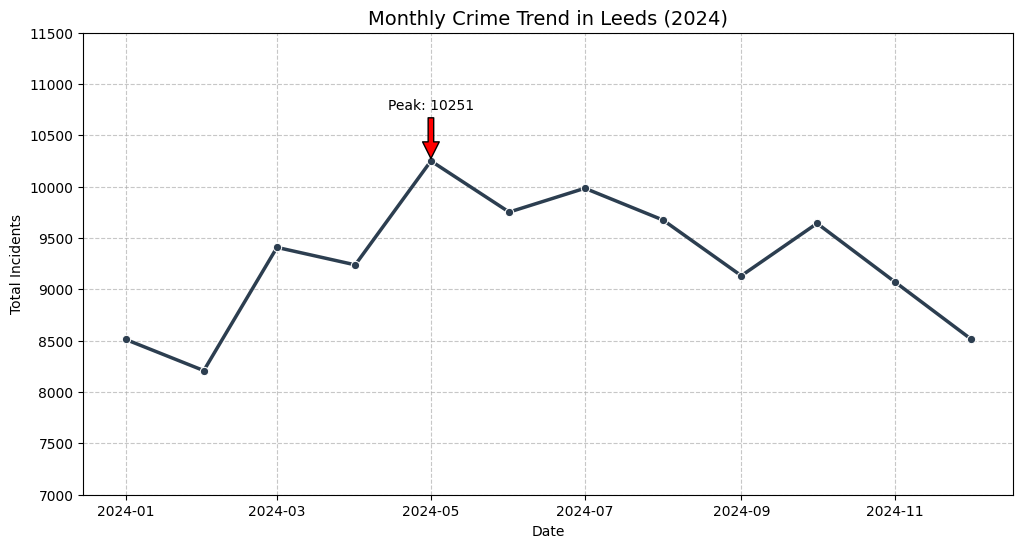

Figure 3: Monthly Crime Trend. A temporal analysis showing total crime volume over 12 months. Note the distinct seasonal peak in May (10,251 incidents) and the secondary spike in October.


In [52]:
print("2. When is crime happening?")
plot_monthly_trend(gdf_leeds_crimes)
print("Figure 3: Monthly Crime Trend. A temporal analysis showing total crime volume over 12 months. Note the distinct seasonal peak in May (10,251 incidents) and the secondary spike in October.")

3. What are the seasonal trends?


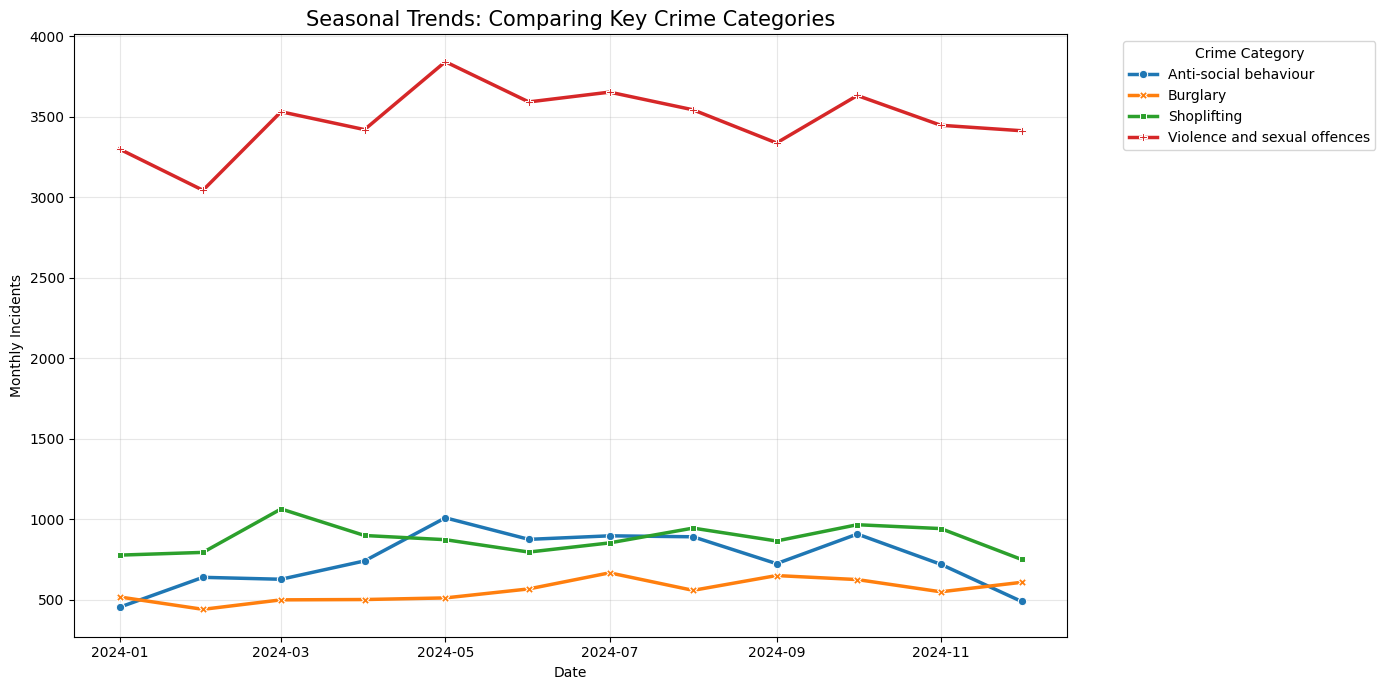

Figure 4: Comparative Seasonal Trends. A multi-line chart illustrating the distinct temporal behaviors of key crime types. Note the divergence in patterns, with Burglary (Orange) trending upwards in winter, while Anti-social behaviour (Blue) exhibits specific spikes in May and October.


In [53]:
print("3. What are the seasonal trends?")
plot_seasonal_trends(gdf_leeds_crimes)
print("Figure 4: Comparative Seasonal Trends. A multi-line chart illustrating the distinct temporal behaviors of key crime types. Note the divergence in patterns, with Burglary (Orange) trending upwards in winter, while Anti-social behaviour (Blue) exhibits specific spikes in May and October.")

4. Which are top dangerous wards?


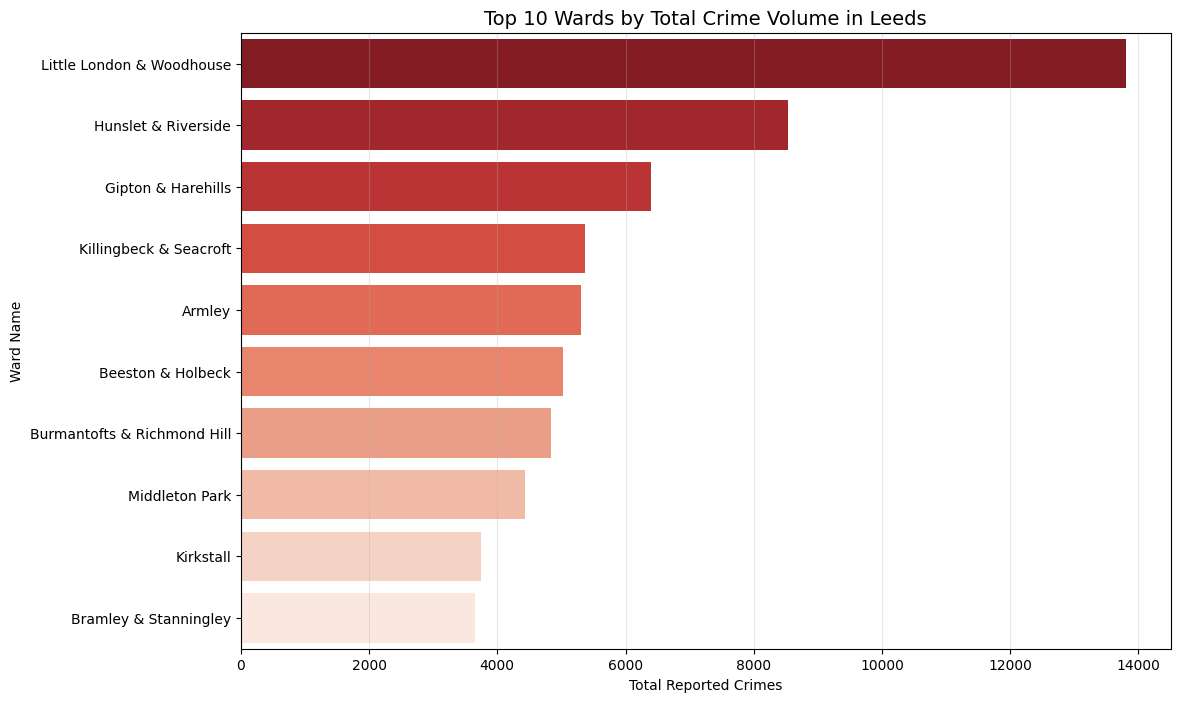

Figure 5: Top 10 Wards by Total Crime Volume. A horizontal bar chart ranking the highest-crime wards. This visualisation reveals significant geographic inequality, with 'Little London & Woodhouse' emerging as a massive outlier (over 13,000 incidents), driven by its high population density and city centre location.


In [54]:
print("4. Which are top dangerous wards?")
plot_top_wards(gdf_leeds_crimes, 10)
print("Figure 5: Top 10 Wards by Total Crime Volume. A horizontal bar chart ranking the highest-crime wards. This visualisation reveals significant geographic inequality, with 'Little London & Woodhouse' emerging as a massive outlier (over 13,000 incidents), driven by its high population density and city centre location.")

5. What are the outcomes?


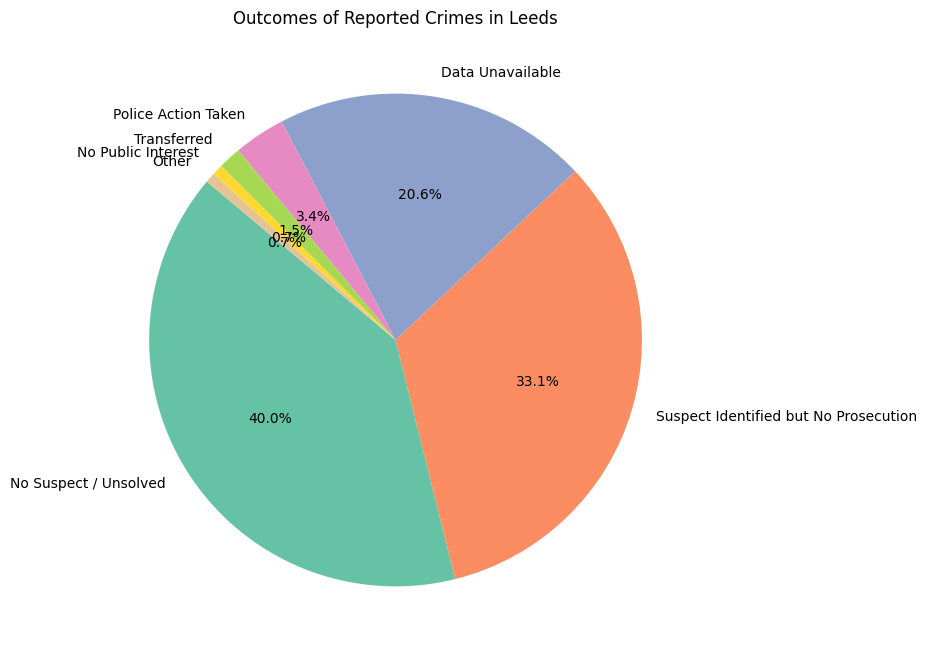

Figure 6: Outcome Distribution of Reported Crimes. A pie chart illustrating the resolution of investigations. The data reveals a significant 'justice gap,' with the vast majority of cases resulting in 'No Suspect / Unsolved' (40.0%) or 'Suspect Identified but No Prosecution' (33.1%), indicating that most reports do not lead to a formal sanction.


In [55]:
print("5. What are the outcomes?")
plot_outcome_distribution(gdf_leeds_crimes)
print("Figure 6: Outcome Distribution of Reported Crimes. A pie chart illustrating the resolution of investigations. The data reveals a significant 'justice gap,' with the vast majority of cases resulting in 'No Suspect / Unsolved' (40.0%) or 'Suspect Identified but No Prosecution' (33.1%), indicating that most reports do not lead to a formal sanction.")



---



#### Objective 3 : Implementation of Geospatial Analysis

**Explanation of Results**

In this objective, we utilised choropleth mapping to spatially identify and differentiate areas of high crime intensity across the Leeds administrative region.

The analysis begins with the total crime heatmap **(Figure 7)**. This visualisation confirmed that the 'Little London and Woodhouse' ward—which encompasses the City Centre—is a high-volume outlier. The map demonstrated that this single ward acts as the primary hotspot for the entire region, visually proving the hypothesis that the city core generates the highest density of incident counts due to its high footfall.

However, the most significant analytical insight emerged from the comparative crime maps **(Figure 8)**. By separating the data into specific crime categories, the maps revealed a distinct geographical separation that was hidden in the total figures. The shoplifting map showed a hotspot that was almost entirely exclusive to 'Little London and Woodhouse', reflecting the crime's dependency on high-street commercial activity.

In strong contrast, the burglary map uncovered a secondary cluster located away from the city centre. This hotspot was contained within the student residential wards of 'Headingley & Hyde Park' and 'Kirkstall'. This spatial shift provided critical evidence for our research, confirming that "vulnerable residential" crimes target specific neighborhoods that are geographically distinct from the commercial city core. Consequently, this objective proved that crime in Leeds is not random; rather, different wards attract specific crime types based on their demographic and economic functions.


**Visualisation**

1. Show the main heatmap
Generating Total Crime Heatmap...
Adding ward labels...


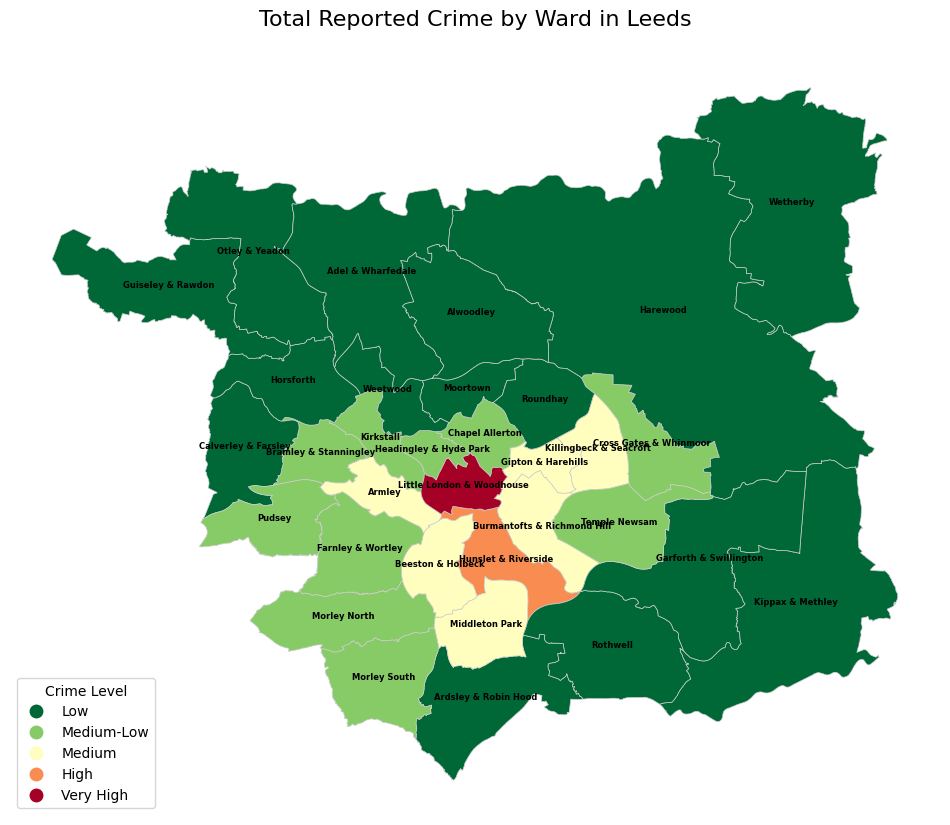

Figure 7: A choropleth map showing the density of Total Crime. Note the intense concentration in the 'Little London & Woodhouse' ward.


In [56]:
print("1. Show the main heatmap")
plot_total_crime_heatmap(gdf_leeds_crimes, LEEDS_WARDS_PATH)
print("Figure 7: A choropleth map showing the density of Total Crime. Note the intense concentration in the 'Little London & Woodhouse' ward.")

2. Show the comparative maps
--- Creating 3-in-1 Comparative Map ---
Generating ASB map...
Generating Burglary map...
Generating Shoplifting map...


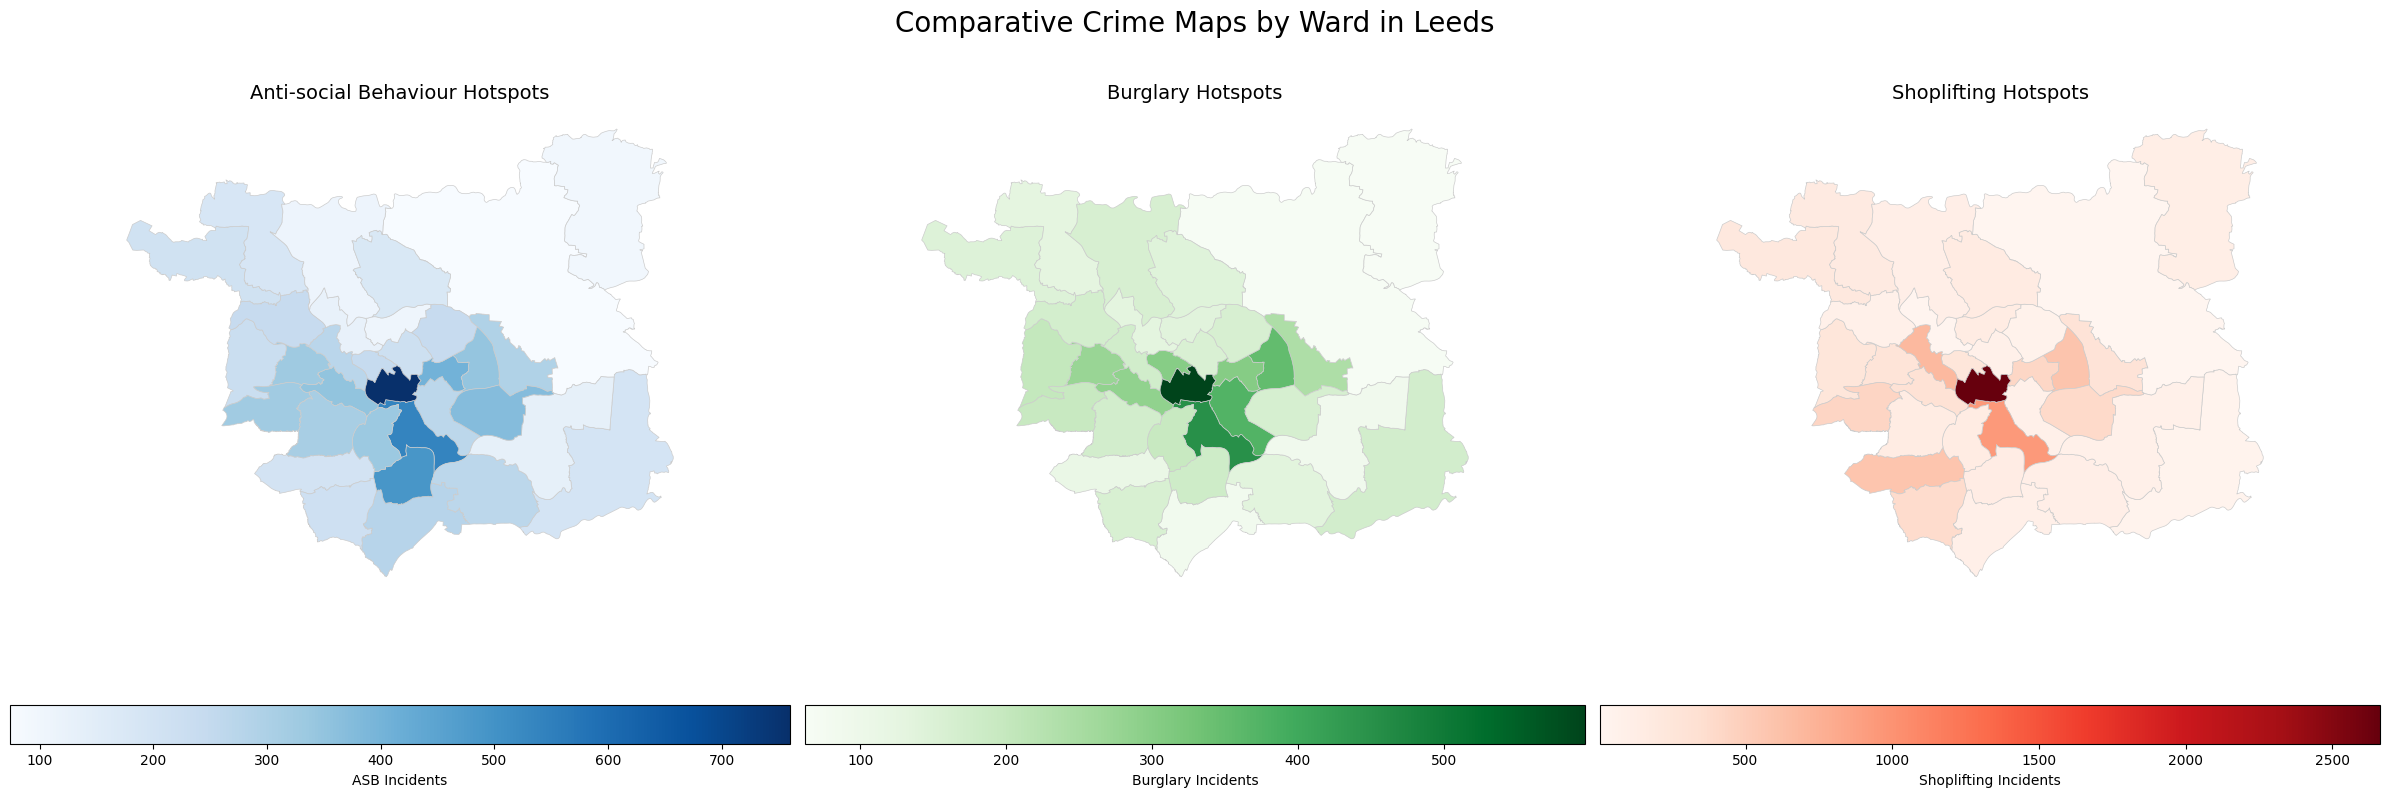

Figure 8: Comparative spatial analysis showing distinctive hotspots.


In [57]:
print("2. Show the comparative maps")
plot_comparative_crime_maps(gdf_leeds_crimes, LEEDS_WARDS_PATH)
print("Figure 8: Comparative spatial analysis showing distinctive hotspots.")

#### Objective 4 : Comparative Crime Analysis

**Explanation of Results**

This final objective synthesised our previous findings to establish a quantitative difference in crime makeup across the region, independent of total crime volume. The primary goal was to generate a statistical "crime fingerprint" to definitively test our hypothesis.

The process began with the classification of all crime incidents into three distinct sub-areas: 'City Centre', 'Student Residential', and 'Other Wards'. To ensure a fair comparison between these vastly different population sizes, we applied statistical normalization. This converted the raw crime counts into percentage-based profiles, allowing us to compare the mix of crime rather than just the amount.

The resulting 'Crime Fingerprint' chart **(Figure 9)** provided definitive proof that the area profiles were statistically distinct. The analysis revealed that the 'City Centre' profile was dominated by crimes linked to the commercial economy, specifically Shoplifting, which accounted for approximately 19.3% of its total crime—more than double the rate seen in other areas.

In strong contrast, the 'Student Residential' profile exhibited a "vulnerable residential" signature. It showed a significantly higher ratio of Burglary (6.9%) compared to the City Centre (4.3%). Furthermore, the student profile featured the highest rate of Vehicle Crime (11.2%), identifying a specific risk factor for this demographic. Meanwhile, the 'Other Wards' category served as a baseline, primarily defined by 'Violence and Sexual Offences' (39.5%). These quantitative findings confirmed the project hypothesis: primary crime drivers differed fundamentally across wards, with student areas facing specific residential threats distinct from the commercial city core.

**Visualisation**

Tagging wards with area types...
Tagging complete:
area_type
Other Wards            90742
City Centre            13813
Student Residential     6841
Name: count, dtype: int64
Calculating crime profile percentages...
Generating final 'Crime Fingerprint' chart...


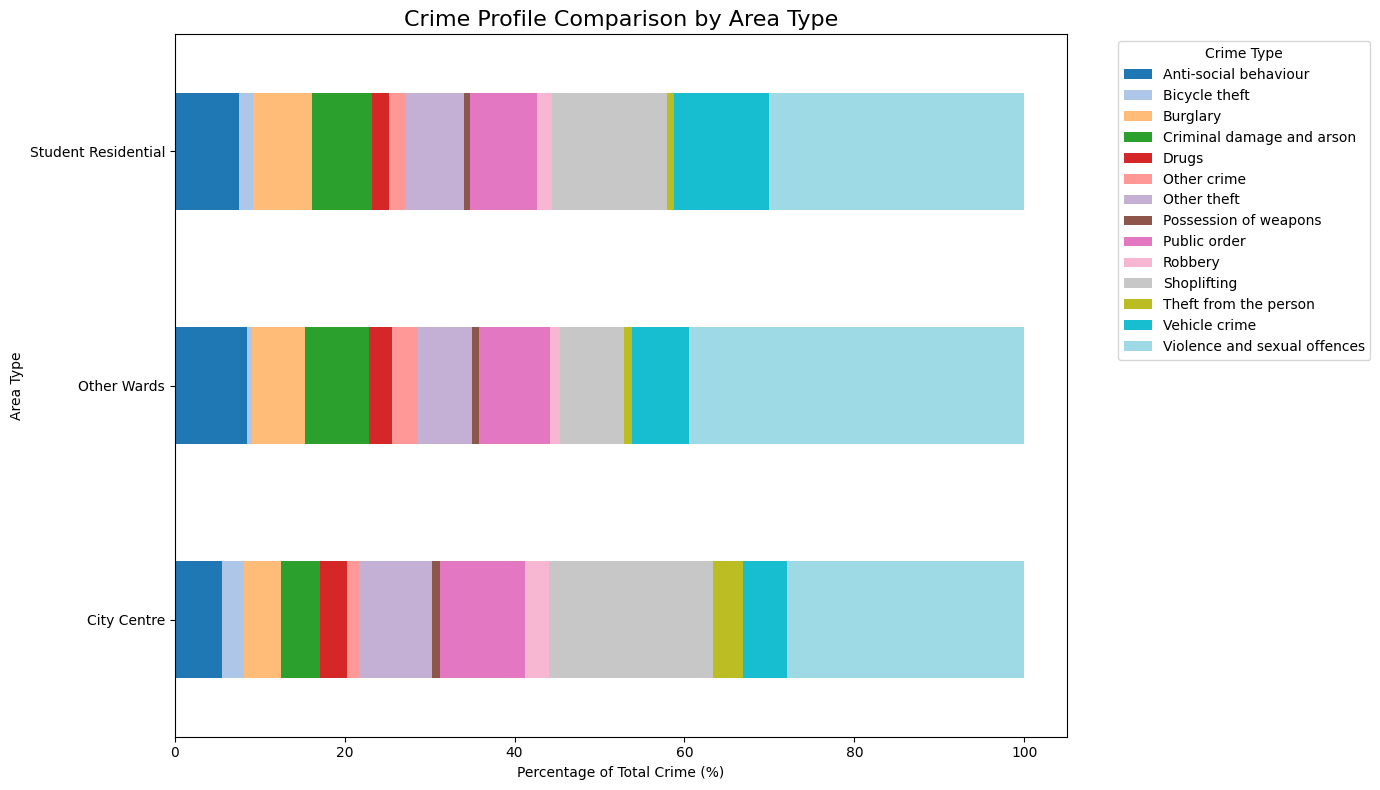

Figure 9: The Crime Fingerprint. A normalised 100% stacked bar chart comparing the crime mix. Note that Student areas (Top Bar) have the largest segments for Burglary and Vehicle Crime, while the City Centre (Bottom Bar) is dominated by Shoplifting.


In [58]:
# 1. Add the 'area_type' column
gdf_tagged = tag_area_types(gdf_leeds_crimes)

# 2. Calculate the percentage profile
crime_profile_table = calculate_crime_profile(gdf_tagged)

# 3. Plot the final result
plot_crime_profile(crime_profile_table)
print("Figure 9: The Crime Fingerprint. A normalised 100% stacked bar chart comparing the crime mix. Note that Student areas (Top Bar) have the largest segments for Burglary and Vehicle Crime, while the City Centre (Bottom Bar) is dominated by Shoplifting.")


---


# Conclusion

This project set out to determine whether student-heavy residential areas in Leeds exhibit a distinct crime profile compared to the wider city. By integrating 12 months (Jan, 2024 - Dec, 2024) of street-level police logs with administrative geospatial data, we successfully moved beyond aggregate statistics to reveal the specific behavioral contexts of urban crime. Our analysis confirms the core hypothesis: student areas possess a unique "vulnerable residential" crime signature that is statistically distinct from both the commercial city centre and other residential neighborhoods.

#### Achievements

The project’s primary technical achievement was the development of a robust, reproducible ETL pipeline capable of ingesting, cleaning, and spatially filtering over 100,000 crime records. Through Exploratory Data Analysis (EDA), we identified critical temporal patterns, specifically an "October Spike" in Anti-social behaviour that correlates with the return of the university population. Most significantly, our comparative analysis successfully quantified the "crime fingerprint" of different demographics. We statistically proved that while the City Centre is dominated by Shoplifting (19%), Student Residential areas are uniquely characterised by disproportionately high rates of Burglary (6.9%) and Vehicle Crime (11.2%).

#### Limitations

The primary limitation of this study lies in the granularity of the source data. The `data.police.uk `dataset utilises anonymised "snap points" rather than exact GPS coordinates to protect privacy. While sufficient for ward-level aggregation, this prevented street-level hotspot analysis or the identification of specific high-risk properties. Additionally, the analysis is subject to "reporting bias," as it only reflects incidents reported to the police, potentially underrepresenting crimes like minor theft or drug use. Finally, our classification of "Student Areas" relied on domain knowledge and ward-level aggregation; this binary classification lacks the precision of granular demographic population data.

#### Future Work

Future iterations of this project would benefit significantly from integrating **2021 Census Data**. By utilising LSOA-level student population statistics, we could replace our rule-based ward classification with a regression model to mathematically correlate student density with crime rates. Additionally, acquiring data with "Time of Occurrence" timestamps would allow for "Day vs. Night" analysis, helping to further separate the night-time economy effects from residential crime. Finally, the pipeline could be extended into a real-time web dashboard to provide up-to-date safety insights for new students arriving in the city.